# Lab 3A

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [2]:
class NaiveBayesClassifier:

  _name = 'Naïve Bayes'

  def __init__(self):
    self._labels = [
      'Class',
      'Alcohol',
      'Malic acid',
      'Ash',
      'Alcalinity of ash',  
      'Magnesium',
      'Total phenols',
      'Flavanoids',
      'Nonflavanoid phenols',
      'Proanthocyanins',
      'Color intensity',
      'Hue',
      'OD280/OD315 of diluted wines',
      'Proline'  
    ]
    self._ylabel = 'Class'
    self._url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

  def run(self):
    """
    Runs the data pipeline and modeling of this classifier.
    """
    print(f'Started running {self._name}')

    print('\nStarted fetching the dataset...\n')
    self._get_data()

    print('\nStarted describing the data...\n')
    self._describe_data()

    print('\nStarted preprocessing the data...\n')
    self._preprocess_data()

    print('\nStarted training the model...\n')
    self._train_model()

    print('\nStarted testing the model...\n')
    self._test_model()

    print('\nStarted evaluating the data...\n')
    self._evaluate_model()
  
  def _get_data(self):
    """
    Fetches the data from the URL and creates a Pandas DataFrame.
    """
    try:
      self._df = pd.read_csv(self._url, header=None, names=self._labels)
      print('Fetched data.')
    except:
      raise Exception(f'Error. Could not fetch data from {self._url}')
  
  def _describe_data(self):
    """
    Describes and visualizes the data.
    """
    # Print info
    print('Information about the data:\n')
    print(self._df.info())

    # Print head
    print('\nHead rows of data:\n')
    print(self._df.head())

    # Visualize data
    for column in self._df.columns:

      # Skip y label
      if column == self._ylabel:
        continue
      
      # Plot
      s = sns.displot(self._df, x=column, hue=self._ylabel)
      s.fig.suptitle(f'{column} by {self._ylabel}')
      plt.show()
  
  def _preprocess_data(self):
    """
    Preprocesses data, among others by checking for missing values.
    """
    # Missing values
    print('Checking for missing values...')
    if self._df.isnull().sum().sum() == 0:
      print('There are no missing values.')
    else:
      print('There are missing values:')
      print(self._df.isnull().sum())
    
    # Create X and y
    X = self._df.drop(self._ylabel, axis='columns')
    y = self._df[self._ylabel]
    
    # Feature scaling
    sc = StandardScaler()
    X = sc.fit_transform(X)

    # Create train/test sets
    self._X_train, self._X_test, self._y_train, self._y_test = train_test_split(
        X, y,
        test_size=0.3,
        random_state=42)
  
  def _train_model(self):
    """
    Trains the predictive model.
    """
    self._classifier = GaussianNB()
    self._classifier.fit(self._X_train, self._y_train)
  
  def _test_model(self):
    """
    Tests the predictive model.
    """
    self._ypred = self._classifier.predict(self._X_test)

  def _evaluate_model(self):
    """
    Evaluates the accuracy of the predictions.
    """
    cm = confusion_matrix(self._y_test, self._ypred)
    print(f'Accuracy score for {self._name}:\n{accuracy_score(self._y_test, self._ypred)}\n')
    print(f'Confusion matrix:\n{cm}')


Started running Naïve Bayes

Started fetching the dataset...

Fetched data.

Started describing the data...

Information about the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null  

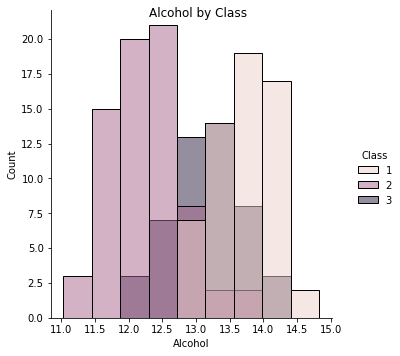

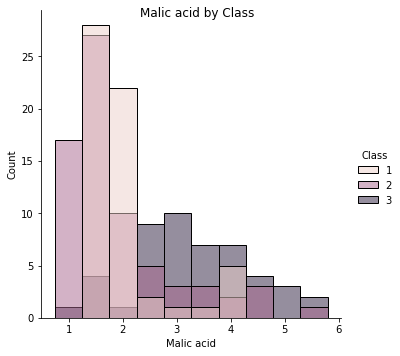

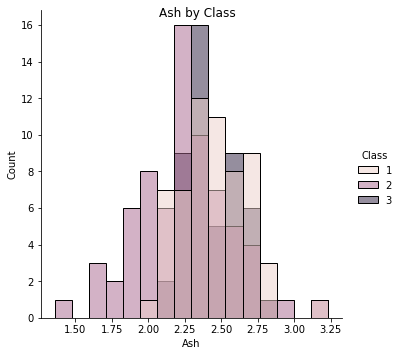

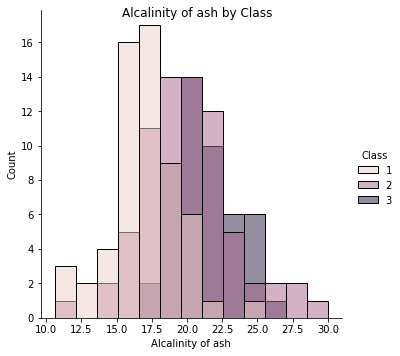

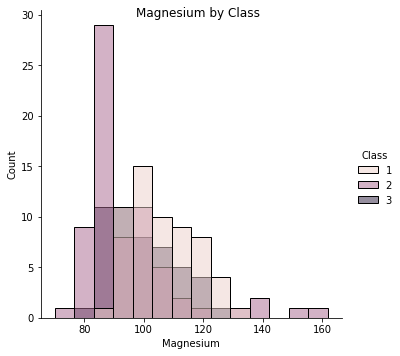

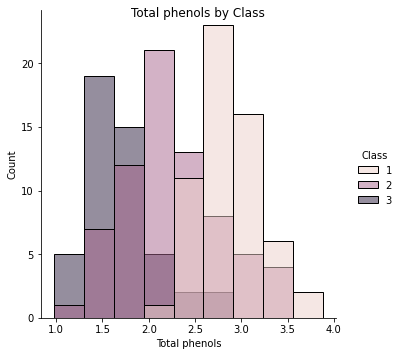

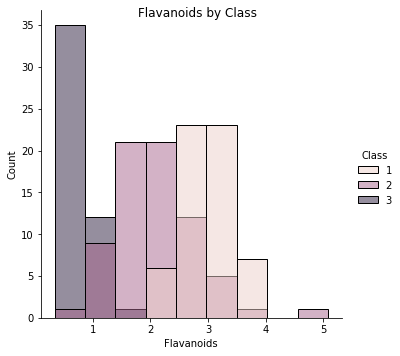

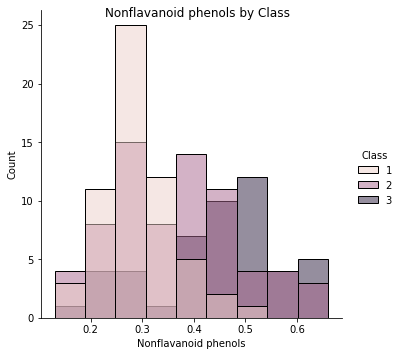

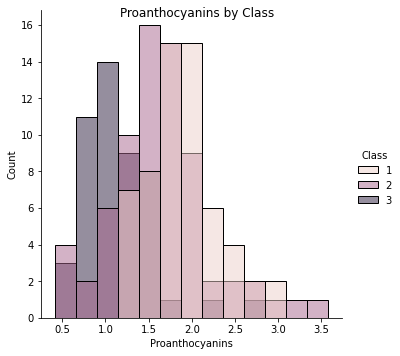

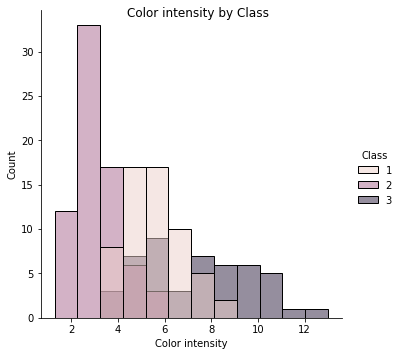

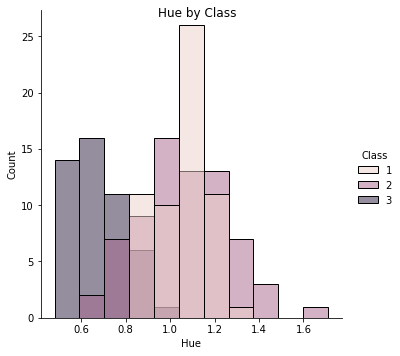

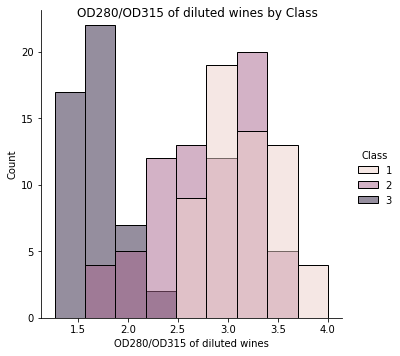

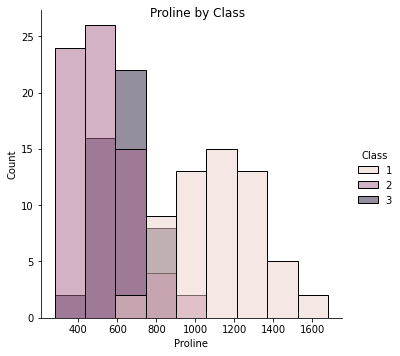


Started preprocessing the data...

Checking for missing values...
There are no missing values.

Started training the model...


Started testing the model...


Started evaluating the data...

Accuracy score for Naïve Bayes:
1.0

Confusion matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [3]:
NaiveBayesClassifier().run()